## Chapter 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 6.4 (Perfect model scenario)

In [12]:
dt = 0.01
Nout = 5
dtout = Nout * dt

d = -0.1
b = 1.
Q = 1.
R = 1.

# initial analysis mean and variance
m0 = 10.
P0 = 2.
# initial reference
y0 = 10.

STEPS = 10000000

yobs = np.zeros((STEPS))
yref = np.zeros((STEPS))
mf = np.zeros((STEPS))
timef = np.zeros((STEPS))
Pf = np.zeros((STEPS))

ma = np.zeros((STEPS+1))
timea = np.zeros((STEPS+1))
Pa = np.zeros((STEPS+1))

ma[0] = m0
Pa[0] = P0
timea[0] = 0.

y = y0

for j in range(STEPS):
    m = ma[j]
    P = Pa[j]
    
    for i in range(Nout):
        # get updated mean and variance (eqn 6.7, 6.8)
        m = m + dt * d * m + dt * b
        P = (1. + dt * d)*P*(1. + dt * d) + 2.*dt*Q
        
        # SDE for reference trajectory (eqn 6.14)
        y = y + dt * d * y + dt * b + np.sqrt(2. * dt * Q) * np.random.randn()
        
    yref[j] = y
    yobs[j] = y + np.sqrt(R) * np.random.randn()
    
    # old analysis = new forecast
    mf[j] = m
    Pf[j] = P
    
    # Kalman gain matrix
    K = P / (P+R)
    
    # Kalman filter equations to calculate analsyis at tn = tNobs
    Pa[j+1] = P - K*P
    ma[j+1] = m - K*(m-yobs[j])
    timea[j+1] = dtout * (j + 1)
    timef[j] = dtout * j

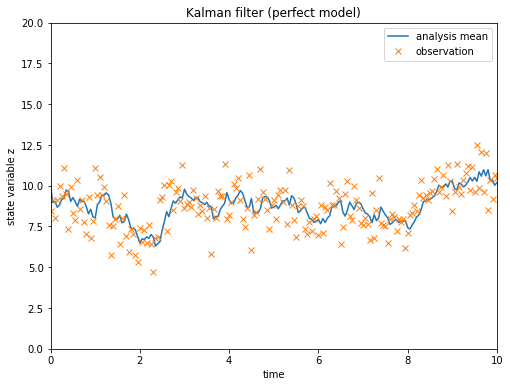

root mean square error = 0.5164
averaged continuously ranked probability score = 0.4120
ratio of y-refs above forecast mean = 0.5004
variance of analysis converges to 0.2666.


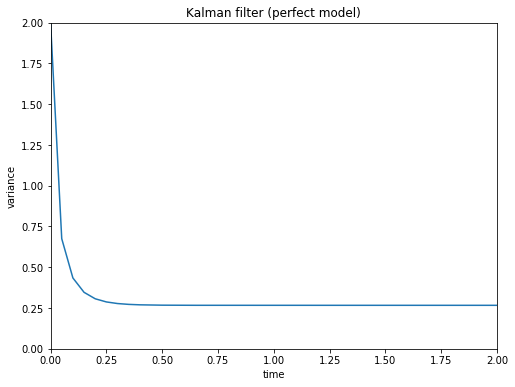

In [13]:
fig0a = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],ma[:1000], '-', label="analysis mean")
plt.plot(timef[:1000],yobs[:1000], 'x', label="observation")
plt.xlabel("time")
plt.ylabel("state variable z")
plt.title("Kalman filter (perfect model)")
plt.xlim([0,10])
plt.ylim([0,20])
plt.legend()
plt.show()

RMSE = np.sqrt(np.mean((yref-ma[1:])**2))
MCRPS = np.mean(np.abs(yref-ma[1:]))

print("root mean square error = %.4f" %RMSE)
print("averaged continuously ranked probability score = %.4f" %MCRPS)

ind = np.where(yref > mf)
print("ratio of y-refs above forecast mean = %.4f" %(float(ind[0].shape[0])/STEPS))
print("variance of analysis converges to %.4f." %Pa[-1])

fig0b = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],Pa[:1000])
plt.xlabel("time")
plt.ylabel("variance")
plt.xlim([0,2])
plt.ylim([0,2])
plt.title("Kalman filter (perfect model)")
plt.show()

### Example 6.4 (Imperfect model scenario)

In [14]:
d = -0.5

mf = np.zeros((STEPS))
timef = np.zeros((STEPS))
Pf = np.zeros((STEPS))

ma = np.zeros((STEPS+1))
timea = np.zeros((STEPS+1))
Pa = np.zeros((STEPS+1))

ma[0] = m0
Pa[0] = P0
timea[0] = 0.

for j in range(STEPS):
    m = ma[j]
    P = Pa[j]
    
    for i in range(Nout):
        # get updated mean and variance (eqn 6.7, 6.8)
        m = m + dt * d * m + dt * b
        P = (1. + dt * d)*P*(1. + dt * d) + 2.*dt*Q
    
    # old analysis = new forecast
    mf[j] = m
    Pf[j] = P
    
    # Kalman gain matrix
    K = P / (P+R)
    
    # Kalman filter equations to calculate analsyis at tn = tNobs
    Pa[j+1] = P - K*P
    ma[j+1] = m - K*(m-yobs[j])
    timea[j+1] = dtout * (j+1)
    timef[j] = dtout * j

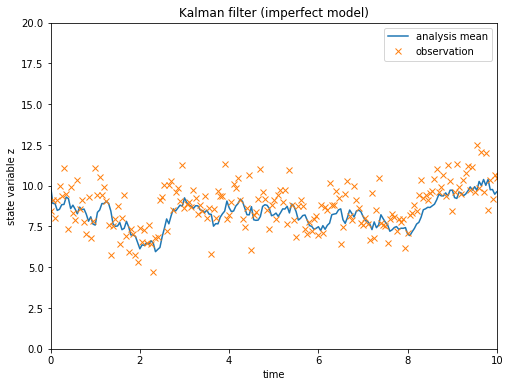

root mean square error = 0.7710
averaged continuously ranked probability score = 0.6361
ratio of y-refs above forecast mean = 0.8711
variance of analysis converges to 0.2530.


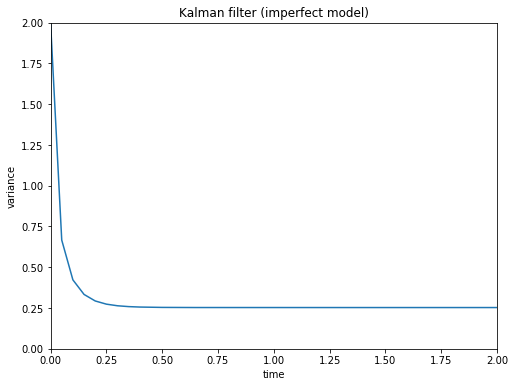

In [15]:
fig0c = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],ma[:1000], '-', label="analysis mean")
plt.plot(timef[:1000],yobs[:1000], 'x', label="observation")
plt.xlabel("time")
plt.ylabel("state variable z")
plt.title("Kalman filter (imperfect model)")
plt.xlim([0,10])
plt.ylim([0,20])
plt.legend()
plt.show()

RMSE = np.sqrt(np.mean((yref-ma[1:])**2))
MCRPS = np.mean(np.abs(yref-ma[1:]))

print("root mean square error = %.4f" %RMSE)
print("averaged continuously ranked probability score = %.4f" %MCRPS)

ind = np.where(yref > mf)
print("ratio of y-refs above forecast mean = %.4f" %(float(ind[0].shape[0])/STEPS))
print("variance of analysis converges to %.4f." %Pa[-1])

fig0d = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],Pa[:1000])
plt.xlabel("time")
plt.ylabel("variance")
plt.xlim([0,2])
plt.ylim([0,2])
plt.title("Kalman filter (imperfect model)")
plt.show()

### Example 6.7 (4DVar)

Taken from Chapter 1, Example 8. Lorenz model as a surrogate physical process

In [207]:
sigm = 10.
rho = 28.
beta = 8./3
dt = 0.001
Nout = 50
a = 1. / np.sqrt(dt)
fakt = 1.99999
N = 2 * 10**5

# initial conditions
x = -.587
y = -.563
z = 16.870
g1 = a * (1. / np.sqrt(2.) - .5)
g2 = a * (1. / np.sqrt(3.) - .5)
g3 = a * (1. / np.sqrt(5.) - .5)
res = np.zeros((N,7))

def gi(gi):
    if ((gi >= -a/2) and gi < 0):
        return a * (fakt * gi / a + 0.5)
    else:
        return a * (-fakt * gi / a + 0.5)
        
for i in range(N):
    res[i,:] = [i, x, y, z, g1, g2, g3]
    
    g1 = gi(g1)
    g2 = gi(g2)
    g3 = gi(g3)
    
    xn = x + dt * (sigm * (y - x)) + dt * g1
    yn = y + dt * (x * (rho - z) - y) + dt * g2
    zn = z + dt * (x * y - beta * z) + dt * g3
    
    x, y, z = xn, yn, zn
    
res[:,0] *= dt

# store only points with dt = 0.05
ressug = res[::Nout]

# add measurement error using tent map
meas = np.zeros((N*4,2))
a = 4.
fakt = 1.99999
eta1 = a * (2.**(-1./2) - 0.5)

for i in range(N*4):
    if ((eta1 >= -a/2) and (eta1 < 0)):
        eta1 = (fakt * eta1 + 0.5 * a)
    else:
        eta1 = (-fakt * eta1 + 0.5 * a)
    meas[i] = [i+1, eta1]
    
measerr = meas[:,1][::10]

# observation of x-component (dt = 0.05, first 200 datapoints)
obsx = np.zeros((N/Nout,3))
j = 0
i = 0

for k in range(0,N,Nout):
    err = 1./20 * np.sum(measerr[j:j+20])
    obsx[i] = [res[k,0], res[k,1], err]
    i += 1
    j += 20
    
obsx = np.array(obsx)
obs = [obsx[:,0], obsx[:,1] + obsx[:,2]]
obs = np.array(obs)

In [23]:
# Perform 4DVar
NA = 5
CYCLES = 40
alpha = 0.025

R = 1./15

x0 = -.587
y0 = -.563
z0 = 16.870

x_anal = np.zeros((CYCLES*NA+1))
y_anal = np.zeros((CYCLES*NA+1))
z_anal = np.zeros((CYCLES*NA+1))

rmseX = np.zeros((8))
rmseY = np.zeros((8))
rmseZ = np.zeros((8))
b = np.zeros((8))

for lkl in range(8):
    if lkl == 0:
        delta = 10000.
    elif lkl == 1:
        delta = 100.
    else:
        delta = 8.*1./2**(lkl-2.)
    
    KS = 1
    x_fg = np.copy(x0)
    y_fg = np.copy(y0)
    z_fg = np.copy(z0)
    
    for lll in range(CYCLES):
        x = np.zeros((NA+1))
        y = np.zeros((NA+1))
        z = np.zeros((NA+1))
        t = np.zeros((NA+1))
        
        xb = x_fg
        yb = y_fg
        zb = z_fg
        
        x[0] = np.copy(x_fg)
        y[0] = np.copy(y_fg)
        z[0] = np.copy(z_fg)
        t[0] = 0.
        
        vareps = 1.
        ll = 1
        W = []
        
        while vareps >= 1e-2:
            JAC = np.eye(3)
            H = np.array([1, 0, 0])
            dV = np.zeros((3,NA))
            r = np.zeros((NA))
            
            for j in range(NA):
                xh = x[j]
                yh = y[j]
                zh = z[j]
                
                for i in range(Nout):
                    xo = xh
                    yo = yh
                    zo = zh
                    
                    xh = xo + dt * 10. * (yo-xo)
                    yh = yo + dt * (xo * (28. - zo) - yo)
                    zh = zo + dt * (xo * yo - 8./3 * zo)
                    
                    # Get the Jacobian of the current iteration
                    DF = np.array([[-10., 10., 0.],[28. - zo, -1., -xo],[yo, xo, -8./3]])
                    
                    # Update step for the Jacobian
                    JAC = np.dot((np.eye(3) + dt * DF) , JAC)
                    
                x[j+1] = xh
                y[j+1] = yh
                z[j+1] = zh
                
                # Calculate residual: (forward map of reference - yobs)
                r[j] = xh - obs[1,j+KS]
                #print(r)
                # Gradient of the objective functional for each observation time-step
                dV[:,j] = np.dot(JAC.T,H.T*r[j])
                #print(dV)
                t[j+1] = dt * Nout * (j+1)
                
            # Objective functional
            W.append(.5 * np.sum(r**2) + .5 * ((x[0] - xb)**2 + (y[0] - yb)**2 + (z[0] - zb)**2) / delta)
            # Gradient of the objective functional over a data assimilation cycle
            dW = np.sum(dV, axis=1) + np.hstack((x[0] - xb, y[0] - yb, z[0] - zb)) / delta
            
            # Gradient descent method - want this to converge to < 1e-2.
            vareps = np.linalg.norm(dW)
            ll += 1 # Can remove this counter - unused.

            x[0] -= alpha * dW[0]
            y[0] -= alpha * dW[1]
            z[0] -= alpha * dW[2]
            
        x_anal[KS-1:KS+NA] = x
        y_anal[KS-1:KS+NA] = y
        z_anal[KS-1:KS+NA] = z

        x_fg = x[-1]
        y_fg = y[-1]
        z_fg = z[-1]

        KS = KS+NA

    print(lkl)
    
    rmseX[lkl] = np.sqrt(np.mean((ressug[:KS,1] - x_anal[:KS])**2))
    rmseY[lkl] = np.sqrt(np.mean((ressug[:KS,2] - y_anal[:KS])**2))
    rmseZ[lkl] = np.sqrt(np.mean((ressug[:KS,3] - z_anal[:KS])**2))
    b[lkl] = delta

0
1
2
3
4
5
6
7


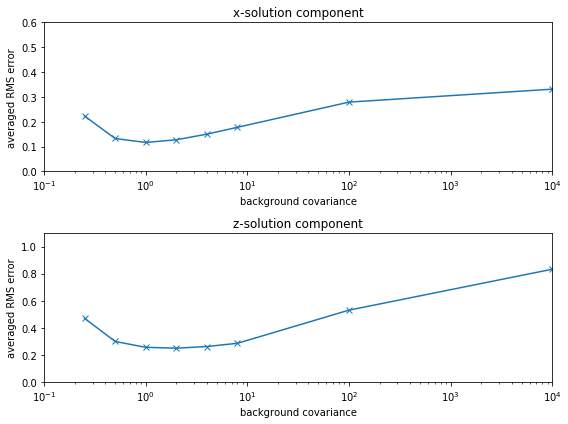

In [26]:
fig1 = plt.figure(figsize=(8,6))
ax = fig1.add_subplot(2, 1, 1)
ax.semilogx(b,rmseX,'-x')
ax.set_xlabel("background covariance")
ax.set_ylabel("averaged RMS error")
ax.set_title("x-solution component")
ax.set_xlim([0.1,10000])
ax.set_ylim([0.0,0.6])

ax = fig1.add_subplot(2, 1, 2)
ax.semilogx(b,rmseZ,'-x')
ax.set_xlabel("background covariance")
ax.set_ylabel("averaged RMS error")
ax.set_title("z-solution component")
ax.set_xlim([0.1,10000])
ax.set_ylim([0.0,1.1])
plt.tight_layout()
plt.show()

### Example 6.9 (Sequential importance sampling (SIS) filter)

First run the cell from Example 6.7 for the Lorenz model as a surrogate process.

In [199]:
STEPS = 40 # 40 windows of observations
R = 1./15

# recall that from example 4.8, the Lorenz model with drift term f(x) set to zero can be modelled 
# by a stochastic difference equation with mean = 0, var = 0.0838.
var = 0.0838
sigma = 0.1

m = np.zeros((5))
rmse_x = np.zeros((5))
rmse_y = np.zeros((5))
rmse_z = np.zeros((5))
effective = np.zeros((5,STEPS+1))

for lkl in range(5):
    if lkl == 0:
        m[lkl] = 10
    else:
        m[lkl] = 10**(lkl+1)
    
    # ensemble size
    M = m[lkl].astype(int)

    # initial PDF is Gaussian with var = 0.1, mean = (x0,y0,z0)
    x = x0 + np.sqrt(sigma) * np.random.randn(M)
    y = y0 + np.sqrt(sigma) * np.random.randn(M)
    z = z0 + np.sqrt(sigma) * np.random.randn(M)
    t = np.zeros((STEPS+1))
    
    weights = 1./M * np.ones((M))
    
    x_f = np.zeros((STEPS+1))
    y_f = np.zeros((STEPS+1))
    z_f = np.zeros((STEPS+1))
    
    x_f[0] = np.dot(weights.T,x)
    y_f[0] = np.dot(weights.T,y)
    z_f[0] = np.dot(weights.T,z)
    
    rmse_x[lkl] = 0.
    rmse_y[lkl] = 0.
    rmse_z[lkl] = 0.
    
    effective[lkl,0] = 1. / np.sum(weights**2)

    for j in range(STEPS):
        xh = x
        yh = y
        zh = z
        
        for i in range(Nout):
            xo = xh
            yo = yh
            zo = zh

            # step within each observation window by means of the stochastiv Lorenz-63 model
            xh = xo + dt * 10. * (yo-xo) + np.sqrt(dt * var) * np.random.randn(M)
            yh = yo + dt * (xo * (28. - zo) - yo) + np.sqrt(dt * var) * np.random.randn(M)
            zh = zo + dt * (xo * yo - 8./3 * zo) + np.sqrt(dt * var) * np.random.randn(M)

        # Calculate residual: (forward map of reference - yobs)
        r = xh - obs[1,j+1]
        # Update weights according to equation 6.29
        weights = np.exp(-r**2 / (R * 2.)) * weights
        weights /= np.sum(weights)

        x = xh
        y = yh
        z = zh
        
        x_f[j+1] = np.dot(weights.T,x)
        y_f[j+1] = np.dot(weights.T,y)
        z_f[j+1] = np.dot(weights.T,z)
        t[j+1] = dt * Nout * (j+1)
    
        rmse_x[lkl] = rmse_x[lkl] + (x_f[j+1] - ressug[j+1,1])**2
        rmse_y[lkl] = rmse_y[lkl] + (y_f[j+1] - ressug[j+1,2])**2
        rmse_z[lkl] = rmse_z[lkl] + (z_f[j+1] - ressug[j+1,3])**2

        effective[lkl,j+1] = 1./np.sum(weights**2)
        
    rmse_x[lkl] = np.sqrt(rmse_x[lkl] / STEPS)
    rmse_y[lkl] = np.sqrt(rmse_y[lkl] / STEPS)
    rmse_z[lkl] = np.sqrt(rmse_z[lkl] / STEPS)

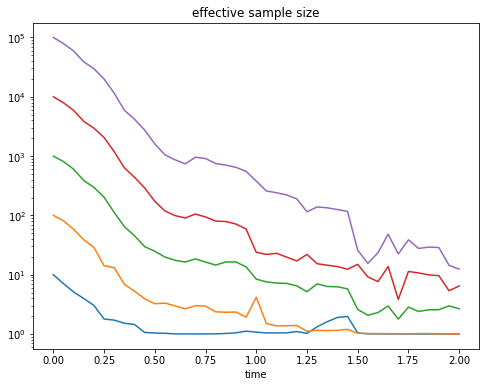

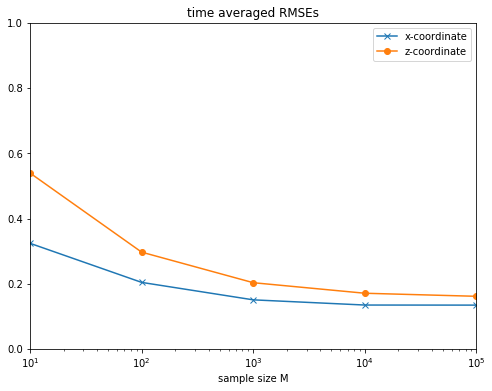

In [200]:
fig2a = plt.figure(figsize=(8,6))
plt.semilogy(t,effective.T)
plt.xlabel("time")
plt.title("effective sample size")
plt.show()

fig2b = plt.figure(figsize=(8,6))
plt.semilogx(m,rmse_x, '-x', label="x-coordinate")
plt.semilogx(m,rmse_z, '-o', label="z-coordinate")
plt.xlabel("sample size M")
plt.title("time averaged RMSEs")
plt.xlim([10,100000])
plt.ylim([0,1.0])
plt.legend()
plt.show()

### Example 6.11 (Sequential importance resampling (SIR) filter)

In [248]:
# define residual resampling function
def resampling(X,w,M,J):
    wm = M*w
    wi = np.floor(wm)
    nc = np.sum(wi).astype(int)

    A = np.zeros((J,nc))
    
    if (nc > 0):
        k = 0
        for i in range(M):
            for j in range(int(wi[i])):
                if j > 0:
                    k += 1
                    A[:,k] = X[:,i]
    else:
        A = np.zeros((J,0))
        
    wmd = wm - wi
    wmd /= np.sum(wmd)
    Nk = M - nc
    
    B = np.zeros((J,Nk))
    
    if (Nk > 0):
        exponent = 1./(np.arange(1,Nk+1)[::-1]).astype(float)
        u = np.cumprod(np.power(np.random.rand(Nk),exponent))
        u = u[::-1]

        wcu = np.cumsum(wmd)
        
        ind = np.zeros((Nk)).astype(int)
        kk = 0
        
        for ll in range(Nk):
            while (wcu[kk] < u[ll]):
                kk += 1
                
            ind[ll] = kk
        B = X[:,ind]
        
    else:
        B = np.zeros((J,0))

    return A, B

In [277]:
STEPS = 5*40 # 40 windows of observations
R = 1./15

# recall that from example 4.8, the Lorenz model with drift term f(x) set to zero can be modelled 
# by a stochastic difference equation with mean = 0, var = 0.0838.
var = 0.0838
sigma = 0.1

NN = 6
m = np.zeros((NN))
rmse_x = np.zeros((NN))
rmse_y = np.zeros((NN))
rmse_z = np.zeros((NN))
effective = np.zeros((NN,STEPS+1))

m = np.arange(50,300+50,50)

for lkl in range(NN):
#     m[lkl] = (lkl + 1) * 50.
    
    # ensemble size
    M = m[lkl]
    
    x0 = -.587
    y0 = -.563
    z0 = 16.870
    
    # initial PDF is Gaussian with var = 0.1, mean = (x0,y0,z0)
    x = x0 + np.sqrt(sigma) * np.random.randn(M)
    y = y0 + np.sqrt(sigma) * np.random.randn(M)
    z = z0 + np.sqrt(sigma) * np.random.randn(M)
    t = np.zeros((STEPS+1))
    
    weights = 1./M * np.ones((M))
    
    x_f = np.zeros((STEPS+1))
    y_f = np.zeros((STEPS+1))
    z_f = np.zeros((STEPS+1))
    
    x_f[0] = np.dot(weights.T,x)
    y_f[0] = np.dot(weights.T,y)
    z_f[0] = np.dot(weights.T,z)

    rmse_x[lkl] = 0.
    rmse_y[lkl] = 0.
    rmse_z[lkl] = 0.
    
    effective[lkl,0] = 1. / np.sum(weights**2)

    for j in range(STEPS):
        xh = x
        yh = y
        zh = z
        
        for i in range(Nout):
            xo = xh
            yo = yh
            zo = zh

            # step within each observation window by means of the stochastiv Lorenz-63 model
            xh = xo + dt * 10. * (yo - xo) + np.sqrt(dt * var) * np.random.randn(M)
            yh = yo + dt * (xo * (28. - zo) - yo) + np.sqrt(dt * var) * np.random.randn(M)
            zh = zo + dt * (xo * yo - 8./3 * zo) + np.sqrt(dt * var) * np.random.randn(M)

        # Calculate residual: (forward map of reference - yobs)
        r = xh - obs[1,j+1]
        
        # Update weights according to equation 6.29
        weights = np.exp(-r**2 / (R * 2.)) * weights
        weights /= np.sum(weights)
        print(weights)
        x = xh
        y = yh
        z = zh
        
        x_f[j+1] = np.dot(weights,x)
        y_f[j+1] = np.dot(weights,y)
        z_f[j+1] = np.dot(weights,z)
        t[j+1] = dt * Nout * (j+1)
    
        rmse_x[lkl] = rmse_x[lkl] + (x_f[j+1] - ressug[j+1,1])**2
        rmse_y[lkl] = rmse_y[lkl] + (y_f[j+1] - ressug[j+1,2])**2
        rmse_z[lkl] = rmse_z[lkl] + (z_f[j+1] - ressug[j+1,3])**2

        effective[lkl,j+1] = 1. / np.sum(weights**2)
        print("effective", effective[lkl,j+1])
        # introduce a resampling step (residual resampling)
        if (effective[lkl,j+1] < M/2.):
            X = np.vstack((x,y,z))
            A, B = resampling(X,weights,M,3)
            
            # reinitialise weights to be equal
            weights = 1./M * np.ones(M)

            x = np.hstack((A[0,:],B[0,:])).T
            y = np.hstack((A[1,:],B[1,:])).T
            z = np.hstack((A[2,:],B[2,:])).T
        
    rmse_x[lkl] = np.sqrt(rmse_x[lkl] / STEPS)
    rmse_y[lkl] = np.sqrt(rmse_y[lkl] / STEPS)
    rmse_z[lkl] = np.sqrt(rmse_z[lkl] / STEPS)


[0.0136704  0.02693687 0.0238407  0.02468621 0.02047504 0.01727844
 0.02976138 0.00277351 0.01478082 0.01188316 0.0236838  0.00064042
 0.02988646 0.00255681 0.01225426 0.02043958 0.02111492 0.01856445
 0.02375073 0.03040721 0.01166722 0.00746771 0.02473126 0.03041809
 0.02259885 0.02879643 0.02881705 0.02643737 0.00468507 0.02912348
 0.01459623 0.026746   0.00736289 0.03042714 0.02619486 0.02639389
 0.01831591 0.02873847 0.03038253 0.02622348 0.00641266 0.00924395
 0.03037773 0.0013171  0.0106896  0.0159721  0.0292269  0.0271682
 0.02114542 0.02893727]
('effective', 41.32534445146351)
[1.12616613e-03 1.39652886e-02 1.51985569e-02 1.15414183e-02
 1.32476003e-02 6.68500561e-03 2.68116424e-02 3.20013082e-04
 1.51225219e-03 1.46135601e-03 3.40714442e-02 1.72678259e-05
 2.92999984e-02 2.77298296e-04 2.40375747e-03 2.04073984e-02
 2.30106415e-02 2.38147793e-02 2.68026083e-02 3.97227587e-02
 6.81458100e-03 2.24987001e-03 3.83953733e-02 4.71484725e-02
 1.53293140e-02 4.47251588e-02 3.92288092e

[6.99900570e-16 9.77060087e-03 1.22713794e-02 5.74210165e-03
 5.80371230e-03 9.61194825e-03 1.65997112e-02 2.83003370e-02
 2.34286198e-02 3.06127288e-02 3.57257064e-02 4.47994690e-02
 1.69891608e-02 3.09705407e-02 1.26947070e-02 1.05486455e-02
 3.37731527e-02 4.52184235e-02 2.24524108e-02 4.26958112e-02
 7.84437215e-17 1.12445313e-15 2.95585154e-15 5.21696078e-16
 2.31739761e-16 3.10964614e-16 2.06571459e-15 8.86865333e-16
 6.99272506e-16 2.50149383e-15 1.04185571e-15 3.05814461e-17
 5.36139406e-16 3.71135768e-16 8.08604354e-17 1.63327316e-15
 1.00743699e-15 4.47776558e-02 1.15094493e-02 3.25758884e-02
 2.48643157e-02 5.76949090e-02 4.78701153e-02 5.70060353e-02
 5.71325297e-02 5.67119334e-02 4.93613727e-02 3.20518492e-02
 3.20286555e-02 5.84061239e-02]
('effective', 24.782081235302318)
[2.57864246e-13 9.16255632e-03 1.33867417e-02 3.28814371e-02
 1.12582034e-02 4.48085259e-04 7.62619699e-03 3.00998663e-03
 6.17815822e-05 1.42261842e-03 2.55926723e-04 2.26237862e-03
 6.29517585e-14 4.9

[4.66874256e-58 3.66914694e-03 3.40746797e-03 5.28074021e-03
 4.78299197e-03 8.46441594e-04 4.79013234e-03 5.60307150e-03
 2.93382772e-02 2.58762620e-02 2.36555988e-02 3.14275925e-02
 2.51869724e-02 3.24291217e-03 4.35554405e-03 5.62763170e-03
 4.59831375e-03 3.51342620e-03 1.50742943e-03 3.86427958e-03
 4.82017580e-03 8.86853840e-04 2.72919726e-02 1.09832780e-02
 2.41840513e-02 1.29248662e-02 1.99903943e-02 1.69247985e-02
 1.52168992e-02 1.52418720e-02 2.74704204e-02 2.08428200e-02
 1.50217355e-02 1.19319414e-02 1.48396407e-02 2.07481610e-02
 1.27306034e-02 1.89051750e-02 1.70600102e-02 2.33237653e-02
 2.40312479e-02 3.41496816e-02 2.32405213e-02 3.19038041e-02
 1.88495782e-02 6.94562685e-03 5.99147594e-03 1.09524173e-02
 2.31330616e-02 3.29690833e-02 2.81044291e-02 2.57740010e-02
 2.90658725e-02 1.50680363e-02 8.55898546e-03 9.83815509e-03
 1.27308757e-02 4.08537154e-03 4.88813324e-03 5.74120008e-03
 2.33499547e-58 1.27713711e-55 1.39562279e-56 7.68630858e-59
 1.09331166e-58 6.048441

[0.00000000e+00 4.12739184e-02 1.70468976e-03 2.63210672e-02
 3.21999918e-02 1.81015443e-02 1.06520598e-02 3.15492751e-02
 7.90390760e-02 6.46435782e-02 4.86487694e-02 2.81773224e-02
 1.73409884e-02 2.52369260e-02 5.58706561e-02 4.02186105e-02
 9.83836455e-03 9.26150537e-03 5.59219091e-02 1.24571662e-02
 1.49747359e-02 1.20972711e-02 6.80301692e-03 8.65255577e-03
 1.24651311e-02 3.37224886e-02 4.61729498e-02 3.91043501e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

[1.84109048e-118 1.61496745e-002 1.26238854e-002 1.28424653e-002
 1.07128608e-002 1.28323231e-002 1.11626186e-002 1.42190668e-002
 1.50688004e-002 1.58793424e-002 1.46232884e-002 1.37586978e-002
 1.35373148e-002 1.52007919e-002 1.51534371e-002 1.39011536e-002
 1.52550128e-002 1.18569040e-002 1.14275162e-002 1.25946165e-002
 1.54240438e-002 1.21007003e-002 1.42466806e-002 1.10496585e-002
 8.43110613e-003 1.32532397e-002 1.05427896e-002 1.06111542e-002
 1.01786449e-002 1.49297495e-002 1.52644413e-002 1.27184472e-002
 1.35659261e-002 1.41403310e-002 1.34009589e-002 1.59875586e-002
 1.56597456e-002 1.54790852e-002 1.62070088e-002 1.47052903e-002
 1.63518341e-002 1.36361587e-002 1.45831273e-002 1.37866603e-002
 1.49646824e-002 1.25521657e-002 1.36543183e-002 1.24804506e-002
 7.85406743e-003 1.11332530e-002 1.18549077e-002 1.17087056e-002
 1.10903107e-002 9.33662113e-003 9.39361047e-121 5.89485803e-119
 2.33749442e-119 6.32706349e-120 1.02915597e-121 1.91491274e-121
 7.52625917e-118 7.683537

[8.54903611e-129 6.19217793e-003 1.21466232e-002 1.21562013e-002
 1.30236856e-002 1.42187029e-002 1.07402036e-002 1.40724219e-002
 1.05936064e-002 1.30385218e-002 1.01959766e-002 1.30063234e-002
 1.51488663e-002 1.44742641e-002 1.15951655e-002 1.43917630e-002
 1.03990713e-002 8.24140960e-003 9.09935802e-003 9.06887013e-003
 8.52645704e-003 1.43787893e-002 4.42535370e-003 4.11258757e-003
 9.65425695e-003 9.71790955e-003 6.51448912e-003 8.64625162e-003
 5.83528802e-003 5.05826541e-004 3.30975765e-004 1.39491782e-002
 1.01788439e-002 4.08062005e-003 8.58210109e-003 5.46288085e-003
 1.27457949e-002 9.55636024e-003 1.23466083e-002 6.62382684e-003
 8.74472397e-003 6.89523958e-003 8.69854137e-003 1.21392750e-002
 5.29229592e-003 4.28313382e-003 3.07105239e-003 1.02640988e-002
 1.36078853e-003 8.99539782e-003 9.24761672e-003 6.82542258e-003
 1.07476554e-002 1.34086345e-002 1.31104859e-002 1.52088379e-002
 1.28934892e-002 1.28493112e-002 1.15885421e-002 1.57143805e-002
 8.57177666e-003 1.568835

('effective', 84.08037183688178)
[3.64410924e-75 6.19130011e-03 2.30977272e-03 1.66142034e-02
 1.51196266e-02 1.86269896e-02 1.14493361e-02 1.85745146e-02
 1.03576290e-02 1.71953277e-02 8.63630732e-03 1.09270424e-02
 7.59908124e-03 1.15712153e-02 2.04840928e-02 1.75861811e-02
 7.96252999e-03 4.66257154e-03 1.12340190e-02 7.31643361e-04
 2.97631776e-03 7.47528390e-04 5.56303972e-03 3.13157296e-03
 1.77140438e-02 1.68695912e-02 1.96282213e-02 1.94103687e-02
 1.66909203e-02 1.25092123e-02 1.70433470e-02 1.45452642e-02
 8.24478557e-03 1.76491726e-02 1.43146836e-02 1.75534223e-02
 1.53122807e-02 1.57052116e-02 1.91327582e-02 1.69555335e-02
 1.81470372e-02 1.12206789e-02 1.77724596e-02 1.36710027e-02
 1.30168622e-02 1.71151422e-02 1.73932660e-02 4.47821992e-03
 1.25387402e-02 9.23638423e-03 1.36308728e-03 1.03912296e-02
 7.62020541e-73 5.23376820e-81 5.53944952e-88 2.81803853e-78
 1.56571245e-81 2.38796994e-83 5.11590216e-77 8.43447376e-80
 1.05761658e-80 7.51740473e-71 1.38460063e-82 1.3298

[4.41695265e-216 1.38483808e-002 1.16768759e-002 1.74368690e-002
 1.16191902e-002 1.82496193e-002 8.92189978e-003 1.71741270e-002
 1.38992077e-002 2.50585765e-003 1.29666304e-002 2.12768545e-002
 6.18318136e-003 2.10724621e-002 2.03851788e-002 1.23523647e-002
 2.08451206e-002 1.17493130e-002 2.12842043e-002 1.90112474e-004
 1.52642341e-002 2.47370919e-003 2.11008743e-002 1.61696585e-002
 1.79261595e-002 3.21924725e-005 2.09339534e-002 4.77037854e-003
 1.94877918e-002 2.06790840e-002 3.43701759e-003 2.40121337e-003
 2.05189855e-002 6.70264161e-003 1.70663252e-002 1.46559753e-002
 1.74541615e-002 3.01626305e-003 1.73251330e-002 9.51682288e-219
 2.68528924e-213 1.38936729e-222 5.17168207e-215 3.66683153e-220
 2.17136816e-227 1.14704041e-220 6.65910426e-217 5.05903042e-213
 6.88514367e-224 9.81717004e-216 3.35348128e-219 7.83356049e-219
 4.50121756e-218 6.09858122e-221 3.32711297e-224 4.04826453e-214
 2.32613097e-216 3.07280993e-217 2.96973296e-218 1.40492464e-222
 6.67017978e-213 1.941665

[4.18350782e-09 1.42093501e-02 1.25929810e-02 1.41593473e-02
 2.11439497e-03 3.82197271e-03 1.04476501e-02 1.36469263e-02
 1.12469116e-02 1.05913335e-02 4.14436315e-03 3.52397256e-03
 6.15164624e-03 1.00861280e-02 8.35896166e-04 1.28209999e-02
 6.46880863e-03 4.92043635e-03 9.42755320e-03 1.33288612e-02
 1.17719764e-02 1.13402231e-02 1.40011888e-02 6.96404851e-03
 8.83035977e-03 1.31972100e-02 1.19799802e-02 8.76760770e-03
 3.34689434e-03 1.41964811e-02 1.41955701e-02 1.16164442e-02
 4.24175440e-03 3.53418537e-03 1.96730944e-03 6.07489943e-03
 7.63179705e-03 1.41144670e-02 4.07854033e-03 3.03223602e-03
 1.03423666e-02 1.30169161e-02 1.40285679e-02 1.38106535e-02
 1.41984830e-02 5.62812870e-03 2.48744215e-03 2.23163700e-03
 8.20764920e-03 1.00251435e-02 9.06488883e-03 4.84559757e-03
 2.69198211e-03 1.23737963e-02 1.34008283e-02 7.54751391e-03
 9.23622710e-03 1.35030967e-02 5.21071344e-03 6.36511057e-03
 1.35763215e-02 2.73082252e-03 3.33920213e-03 1.41452137e-02
 5.44702669e-08 6.344513

[2.77234880e-16 9.40225116e-03 1.21213237e-04 2.54915091e-04
 2.61043825e-04 1.38378091e-04 2.86499700e-04 5.19714278e-04
 1.86640490e-04 3.52468022e-04 7.06692066e-04 1.70711240e-04
 3.53495858e-04 8.36535495e-05 3.12748942e-03 1.23104872e-03
 2.67264203e-03 1.12152261e-03 1.73492987e-03 1.78589984e-03
 1.00406317e-02 1.07335453e-02 1.05012392e-02 1.05791918e-02
 1.09411357e-02 1.01969597e-02 5.64872988e-03 6.51263370e-03
 2.96580369e-03 3.89610701e-03 4.14182627e-03 4.81169996e-03
 4.06509258e-03 4.86067076e-03 4.70987892e-03 4.27422618e-03
 2.40239478e-03 2.27752918e-03 5.14223805e-03 2.58843698e-03
 1.03496249e-02 9.95725787e-03 1.04036685e-02 9.38943855e-03
 9.92319909e-03 1.06015601e-02 7.05209139e-03 7.30132492e-03
 7.93308999e-03 9.58726369e-03 8.57301529e-03 9.10341011e-03
 8.20848632e-03 8.83919685e-03 1.02007357e-02 8.20009123e-03
 1.07484193e-02 9.74967354e-03 1.11211798e-02 1.10856330e-02
 1.10986562e-02 1.11385849e-02 1.11201371e-02 1.08912894e-02
 1.11225046e-02 1.113305

[1.48833811e-88 4.04214140e-03 1.87750761e-02 1.63924005e-02
 1.24941600e-02 1.76852553e-02 1.53216758e-02 1.03885982e-02
 1.21124523e-02 1.19258929e-02 8.40241726e-03 1.62585149e-02
 1.42028734e-02 8.72235931e-03 3.13216694e-03 7.34090808e-03
 1.95926888e-03 5.07338002e-03 1.20811893e-02 1.68777184e-02
 9.32674822e-03 1.19386861e-02 8.11895958e-03 8.04383372e-03
 1.42992077e-02 8.15339901e-03 4.81639338e-03 7.22075723e-03
 1.01487081e-02 1.42449925e-02 1.36906549e-02 1.57381202e-02
 1.23534777e-02 1.97111583e-02 1.79307102e-02 1.79069150e-02
 2.28937665e-02 2.33370297e-02 1.59140284e-02 2.18269869e-02
 1.84932765e-02 1.53813499e-02 1.96231204e-03 1.31978136e-02
 9.73823438e-03 1.18203562e-03 1.34596756e-03 1.03657148e-02
 4.88982897e-03 1.60380481e-02 8.88594134e-03 5.26548010e-03
 8.51545959e-03 4.00343251e-03 1.03692552e-02 7.72036815e-03
 2.68991045e-03 1.39340471e-02 1.02827700e-02 1.79698254e-02
 1.66141258e-02 3.84421756e-92 6.51537838e-88 1.82914953e-92
 3.55137432e-91 4.875842

[0.00000000e+00 3.98170991e-03 1.92296874e-03 1.26149530e-03
 2.81458102e-03 2.14897869e-03 4.02152864e-03 3.41059325e-03
 6.75344896e-03 1.09352432e-03 7.55772890e-03 7.61867850e-03
 5.87625914e-03 4.97565434e-03 1.77738103e-02 1.65682426e-02
 1.34616730e-02 1.29768953e-02 1.50381207e-02 1.46672638e-02
 1.30406766e-02 1.26354210e-02 1.40789302e-02 9.85198426e-03
 7.22989645e-03 6.62742776e-03 1.27294691e-02 7.37760887e-03
 1.02365650e-02 1.68510094e-02 1.40366721e-02 8.97035608e-03
 3.94271464e-03 2.97408545e-03 4.91783241e-03 9.00587141e-03
 5.38309812e-03 1.37282388e-02 3.65933940e-03 5.80763308e-03
 1.53513879e-02 9.11273900e-03 5.01263579e-03 6.36773832e-03
 1.18059432e-02 1.24814025e-02 2.13632952e-03 1.89856378e-03
 5.95518571e-04 1.07191526e-03 1.49092405e-03 1.62917783e-03
 2.49384232e-03 9.59528029e-03 5.07163362e-03 3.91495451e-03
 1.08400616e-02 1.11220686e-02 1.50508021e-02 7.73828681e-03
 1.24200859e-02 8.14670162e-03 8.38634695e-03 9.97400442e-03
 1.33744751e-02 1.728619

[2.08852129e-03 3.25501920e-04 6.77270779e-05 5.66672101e-03
 6.23950843e-04 3.72992544e-03 4.78268659e-03 8.71330114e-03
 7.52465276e-03 3.13032085e-03 5.96715948e-04 2.89840004e-04
 8.63824997e-03 8.56141713e-03 5.19169737e-04 1.46304648e-03
 7.57043584e-03 1.57070978e-03 1.54973982e-04 7.39770936e-04
 4.83693392e-03 4.27286383e-05 8.37166661e-04 4.45200267e-03
 3.24183484e-03 8.68301797e-03 8.58291545e-03 1.05560365e-04
 7.80363260e-03 5.99066948e-03 6.90804262e-03 8.26202923e-03
 1.03811213e-04 8.87621260e-03 1.05673321e-03 2.48689090e-03
 4.97869613e-03 1.72708848e-03 6.31324999e-03 5.31710357e-03
 2.52685917e-03 4.09275260e-03 2.04277202e-03 1.23379621e-07
 1.62443390e-03 2.25774675e-04 3.46203491e-03 3.39908956e-03
 2.98333349e-04 2.87020616e-03 2.37178735e-03 2.18892085e-03
 7.15876040e-03 4.72249235e-03 2.36080024e-04 3.01977147e-04
 7.19213053e-03 8.00479029e-03 7.86410384e-03 2.66548741e-03
 8.58579395e-03 8.59611376e-03 8.65009757e-03 1.78038740e-03
 4.29773264e-03 2.523565

[2.94834527e-03 6.49187008e-03 6.83432709e-03 6.21229921e-03
 5.98013734e-03 7.05716644e-03 7.33087774e-03 6.55717442e-03
 5.48047011e-03 7.27106015e-03 6.78038438e-03 7.24988932e-03
 3.14270563e-03 2.07095520e-03 4.78437295e-03 2.86158170e-03
 2.71668273e-03 6.04852279e-03 4.23589056e-03 3.05964981e-03
 4.36789077e-03 3.52572940e-03 4.11787953e-03 4.26800119e-03
 4.00582262e-03 3.18376573e-03 2.24528325e-03 3.25844229e-03
 5.24972666e-03 5.41483709e-03 4.59985892e-03 3.44447783e-03
 3.40427752e-03 2.68811359e-03 5.76626451e-03 4.91721194e-03
 5.66153573e-03 6.14691340e-03 5.67466930e-03 6.50776859e-03
 6.92587135e-03 4.75506722e-03 3.43398299e-03 5.56979018e-03
 5.05557965e-03 3.43378458e-03 2.97478406e-03 2.63622198e-03
 1.16529012e-03 1.63516971e-03 2.40736251e-03 4.06811497e-03
 1.62592157e-03 3.46908866e-03 3.55860400e-03 3.47633404e-03
 3.78700942e-03 5.06450338e-03 4.03861546e-03 5.32353301e-03
 4.95650779e-03 5.40679985e-03 4.42861329e-03 7.22940034e-03
 6.51626179e-03 6.963270

[3.04590503e-090 1.09126644e-002 1.14648618e-002 1.06494005e-002
 6.30178792e-003 1.34689734e-003 1.90118597e-003 2.23929944e-004
 8.93905383e-003 1.96336567e-003 7.36354221e-003 3.58410964e-004
 3.76286283e-003 2.27982207e-003 2.54731908e-003 1.35278266e-002
 1.40519899e-002 5.28432566e-003 5.80675491e-003 2.85518437e-003
 1.14128321e-002 5.77564963e-003 1.21969503e-002 1.23361753e-002
 3.63231398e-003 1.27667909e-002 2.41650506e-003 5.57545077e-003
 4.48481870e-003 3.77928396e-003 7.34680818e-003 5.00623792e-003
 1.40637917e-002 6.61406256e-003 1.55846016e-003 5.10136741e-004
 4.43770022e-003 8.38969306e-003 1.15491220e-002 1.22136887e-002
 9.01422974e-003 1.11913568e-003 1.53825866e-004 2.33068081e-004
 1.01727552e-002 1.31055740e-003 1.63325675e-003 7.20835736e-003
 1.30191718e-002 2.26534841e-003 9.62180254e-004 8.06583307e-003
 1.34536467e-003 8.41473760e-003 9.03060672e-004 2.53208176e-003
 2.98688024e-092 2.24279348e-088 3.72707656e-094 3.76281194e-079
 9.13917806e-092 2.810048

[1.83876409e-09 9.00114221e-03 9.58747953e-03 7.61362800e-03
 7.31886328e-03 9.68167305e-03 1.03065032e-02 9.72592348e-03
 1.00489754e-02 9.74455548e-03 6.04131314e-03 8.18076839e-03
 8.15505092e-03 7.55356704e-03 8.92728150e-03 9.19599906e-03
 8.84979187e-03 7.47013278e-03 7.60287301e-03 8.99863577e-03
 7.80877350e-03 8.33812440e-03 6.54383381e-03 7.37828299e-03
 1.06137698e-02 8.57776989e-03 8.81995250e-03 9.86496590e-03
 1.08663723e-02 9.43659596e-03 8.60415857e-03 9.62880560e-03
 8.75578706e-03 8.68829376e-03 9.43601493e-03 8.28300383e-03
 4.95690009e-03 8.27375323e-03 9.90195821e-03 7.86861012e-03
 7.78089287e-03 9.28950662e-03 1.02033918e-02 1.07876396e-02
 7.86390067e-03 9.57263935e-03 8.94837469e-03 7.88768094e-03
 6.20437898e-03 8.37309473e-03 5.21411564e-03 8.71772927e-03
 5.78555899e-03 8.57867429e-03 8.31822485e-03 7.73016763e-03
 9.35680066e-03 8.17110638e-03 8.04525890e-03 5.91608416e-03
 9.58446338e-03 8.22941248e-03 9.20501946e-03 6.59762229e-03
 6.47791648e-03 8.853833

[2.45003726e-255 8.37390194e-003 8.25755380e-003 8.66973756e-003
 8.16375873e-003 8.62869469e-003 8.73184472e-003 7.29797363e-003
 7.49710167e-003 8.70027118e-003 8.56430882e-003 7.56245755e-003
 7.84960729e-003 8.46170078e-003 8.39655018e-003 6.75631455e-003
 8.58732324e-003 8.74221745e-003 7.82828023e-003 6.18464319e-003
 4.66528187e-003 4.58014686e-003 8.38299919e-003 6.93859188e-003
 5.18618054e-003 7.16409745e-003 8.73657277e-003 7.44760128e-003
 8.38527929e-003 7.16520147e-003 8.50288499e-003 7.52784991e-003
 6.30753534e-003 5.15739818e-003 5.02229072e-003 7.19130564e-003
 8.21097793e-003 8.74736941e-003 8.46976646e-003 8.72151842e-003
 8.61858498e-003 8.74762000e-003 7.04340423e-003 8.70826439e-003
 7.63460572e-003 7.48035261e-003 8.70321449e-003 8.53389003e-003
 8.22867645e-003 7.86210208e-003 6.50631877e-003 7.74650320e-003
 8.63054050e-003 8.12892501e-003 8.72930669e-003 8.72790469e-003
 8.72156103e-003 6.69421573e-003 4.09407557e-003 6.44061257e-003
 3.31534842e-003 8.255836

[4.72707753e-100 6.94692983e-003 6.05300741e-003 4.56380189e-003
 7.04815901e-003 7.08846725e-003 7.43685068e-003 7.42422991e-003
 5.68553423e-003 1.97520917e-003 3.32129338e-003 2.82734029e-003
 6.78171136e-003 7.21514592e-003 6.29737127e-003 5.96945332e-003
 5.11865577e-003 4.21613990e-003 3.07155492e-003 7.49067802e-003
 4.68624789e-003 7.48557948e-003 3.80522941e-003 4.83866861e-003
 3.47727425e-003 6.28208539e-003 7.01921300e-003 7.16639871e-003
 6.14260460e-003 6.58106494e-003 7.25048922e-003 6.16434143e-003
 7.32406338e-003 7.17021413e-003 6.49561199e-003 7.06086903e-003
 6.47179273e-003 2.90842660e-003 4.32588273e-003 3.61920802e-003
 4.37814641e-003 4.74478469e-003 4.78047415e-003 3.96876117e-003
 7.29274423e-003 7.52562937e-003 7.10724367e-003 5.61917496e-003
 6.47445694e-003 3.25661376e-003 6.97574284e-003 7.54957762e-003
 2.62225787e-003 2.61960689e-003 5.42871752e-003 4.20605268e-003
 5.03449452e-003 6.03059750e-003 7.09563397e-003 7.34184782e-003
 1.77594720e-003 4.456271

[0.         0.00878804 0.00753197 0.00875775 0.00798008 0.00774954
 0.00909737 0.00873375 0.00590858 0.00659961 0.00676225 0.00693816
 0.00852953 0.00911505 0.0091212  0.00901681 0.00850067 0.00485553
 0.00871412 0.0084515  0.00823987 0.00881925 0.00895421 0.00342309
 0.00817857 0.00900864 0.00423745 0.00909861 0.00874436 0.00125569
 0.00075659 0.00906582 0.00816554 0.00709899 0.00538997 0.00647914
 0.00896798 0.00911533 0.00619687 0.00612007 0.00737402 0.00377152
 0.00368904 0.00601227 0.00912161 0.00899995 0.00827167 0.00911378
 0.0086461  0.00844466 0.00683961 0.00894218 0.00877679 0.00787664
 0.00174363 0.00215104 0.00844547 0.007733   0.00808091 0.00868643
 0.00799786 0.00844339 0.00849176 0.00718175 0.00607991 0.00689398
 0.00127006 0.00287226 0.00680265 0.00854362 0.00864806 0.00721216
 0.00254239 0.00409646 0.00433904 0.00493154 0.00657429 0.00087026
 0.00227455 0.00222824 0.00731641 0.00689884 0.00736814 0.00130155
 0.         0.         0.         0.         0.         0.
 0.

[0.         0.00281259 0.0020599  0.0022039  0.00368096 0.00233204
 0.00139494 0.00461439 0.00373142 0.00023413 0.00304576 0.00257092
 0.00012308 0.01716179 0.01400034 0.01378033 0.01579341 0.00721256
 0.00733093 0.01064817 0.01333119 0.01191288 0.00298126 0.01491235
 0.01659461 0.01343231 0.01148093 0.00372237 0.00641649 0.00331841
 0.00499989 0.00316857 0.00402816 0.00589183 0.00552393 0.01005254
 0.00502593 0.01673676 0.01714103 0.0083495  0.00933307 0.01304963
 0.01064241 0.00483832 0.00587644 0.00729799 0.00630032 0.00600936
 0.00277058 0.00276015 0.00302142 0.0113927  0.01405895 0.00938804
 0.00137305 0.00157511 0.00760673 0.00929364 0.01287193 0.01048311
 0.00822225 0.00613591 0.00663042 0.00326955 0.00459751 0.01030864
 0.00518456 0.00901709 0.00029646 0.00652131 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

[1.58258781e-05 1.36615472e-02 1.06325955e-02 7.49904633e-03
 1.07863556e-03 7.79784403e-03 1.02770078e-02 8.96762534e-04
 1.74890216e-04 4.23311691e-03 4.81479539e-03 4.28650145e-03
 4.37202611e-06 3.72948111e-05 2.12868769e-05 2.25269369e-04
 1.21131990e-02 2.50489941e-04 4.82170387e-06 3.48443602e-04
 1.00533008e-02 1.33225418e-02 1.30767088e-02 9.03552406e-05
 2.62745437e-05 9.13311217e-04 9.21415518e-05 1.22864365e-04
 5.49076160e-03 1.69234473e-04 1.09781347e-02 1.02404883e-02
 3.79820376e-03 8.94436853e-03 6.85944227e-04 4.94802523e-03
 1.83175629e-06 3.01190009e-04 2.87340214e-03 6.83111207e-04
 7.05591124e-04 7.60299239e-03 3.17926398e-04 4.49288534e-07
 7.83264422e-03 1.26394182e-02 4.72377868e-04 1.25072564e-02
 3.09541830e-03 1.03808391e-03 1.03271875e-03 1.06557978e-05
 4.17936391e-03 1.14906551e-02 1.63485927e-04 5.78716019e-03
 1.21444028e-02 4.51875996e-03 6.70869079e-03 7.62687601e-03
 1.08979690e-02 1.75443398e-04 4.33922238e-05 3.09849700e-03
 2.23300614e-04 1.289224

[0.         0.00844689 0.00415207 0.00646803 0.00401851 0.01095145
 0.0080695  0.00430756 0.00399514 0.00744065 0.00315372 0.00829062
 0.00492382 0.0048013  0.00591218 0.0037322  0.01110512 0.00662183
 0.00395693 0.00668531 0.00207286 0.00172952 0.00032318 0.00038856
 0.00100953 0.00124261 0.00363288 0.0050806  0.00457809 0.00952503
 0.00800669 0.00381996 0.00184599 0.00071191 0.00185118 0.00517567
 0.00155322 0.00160573 0.0017875  0.00213969 0.00134563 0.00065267
 0.00527816 0.00240785 0.00210275 0.00466883 0.00453929 0.00516314
 0.00584932 0.00193155 0.00594879 0.00674867 0.00818696 0.00364598
 0.00213677 0.00222093 0.00158798 0.00047958 0.00062529 0.00041174
 0.00148078 0.00032362 0.00064911 0.0051857  0.00200961 0.00245921
 0.00189334 0.00100778 0.00755655 0.00546004 0.00274324 0.00366175
 0.00271602 0.00493403 0.01232789 0.00332215 0.00553384 0.00313483
 0.00241176 0.01210071 0.0087292  0.00437367 0.00432344 0.00280695
 0.00171706 0.00057303 0.0019008  0.0036259  0.00128601 0.0027

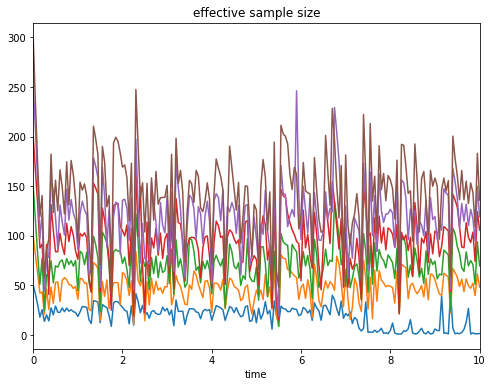

[ 50 100 150 200 250 300]
[2.69531418 0.19299439 0.16572123 0.16729431 0.17083255 0.15907904]
[10.44092586  1.81395103  1.12874452  0.87094999  1.5619142   0.57490202]


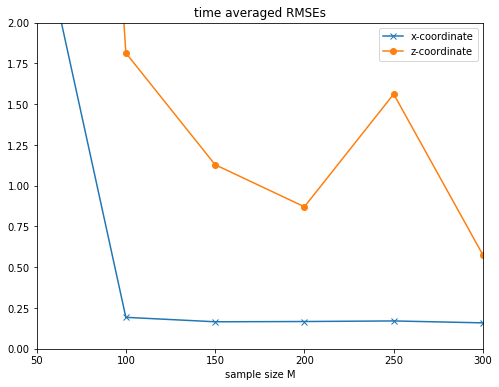

In [278]:
fig3a = plt.figure(figsize=(8,6))
plt.plot(t,effective.T)
plt.xlabel("time")
plt.title("effective sample size")
plt.xlim([0,10.])
plt.show()

fig3b = plt.figure(figsize=(8,6))
plt.plot(m,rmse_x, '-x', label="x-coordinate")
plt.plot(m,rmse_z, '-o', label="z-coordinate")
print(m)
print(rmse_x)
print(rmse_z)
plt.xlabel("sample size M")
plt.title("time averaged RMSEs")
plt.xlim([50,300])
plt.ylim([0,2.0])
plt.legend()
plt.show()